# Классификация отзывов к фильмам. Бинарная классификация

## Используемые библиотеки

In [1]:
from keras.datasets import imdb
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

## Загрузка данных

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

## Осмотр данных

In [3]:
word_index = imdb.get_word_index()
invert_word_index = {word_index.get(key): key for key in word_index.keys()}

In [4]:
review = ' '.join([invert_word_index.get(idx - 3, '?') for idx in x_train[0]])
print(review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

## Подготовка данных

In [5]:
def vectorize_sequences(sequences, dimension = 10_000):
    result = np.zeros((len(sequences), dimension))
    
    for i in range(len(sequences)):
        result[i, sequences[i]] = 1
        
    return result

In [6]:
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [7]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

##  Обучение модели

### Тренировочные и валидационные данные

In [8]:
x_val = x_train[:10_000]
partial_x_train = x_train[10_000:]

y_val = y_train[:10_000]
partial_y_train = y_train[10_000:]

### Конструирование сети

In [9]:
model = models.Sequential()

model.add(layers.Dense(16, activation='tanh', input_shape=(10_000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

2023-01-15 17:31:38.354611: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Обучение

In [10]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.4793 - acc: 0.8062 - val_loss: 0.3576 - val_acc: 0.8742
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2777 - acc: 0.9079 - val_loss: 0.2897 - val_acc: 0.8881
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1989 - acc: 0.9331 - val_loss: 0.3130 - val_acc: 0.8711
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1483 - acc: 0.9509 - val_loss: 0.2844 - val_acc: 0.8862
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1132 - acc: 0.9639 - val_loss: 0.3461 - val_acc: 0.8705
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0894 - acc: 0.9725 - val_loss: 0.3289 - val_acc: 0.8802
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0696 - acc: 0.9783 - val_loss: 0.3678 - val_acc: 0.8774
Epoch 8/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0564 - a

### Провека метрик

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [12]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

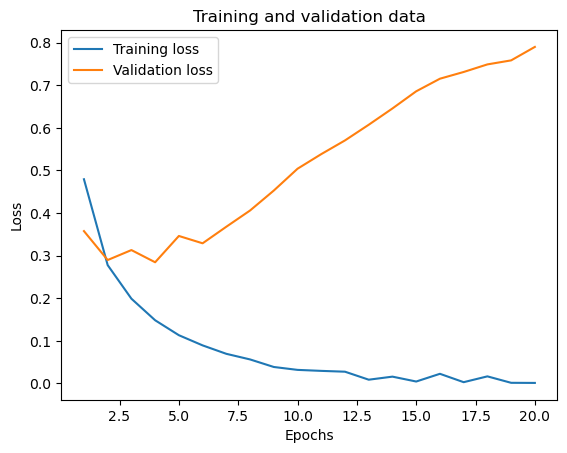

In [13]:
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

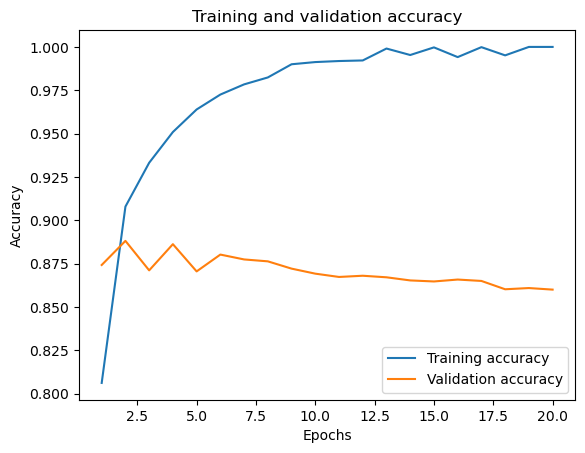

In [15]:
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Финальное обучение

In [16]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10_000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [17]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=4,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/4
30/30 [==============================] - 2s 36ms/step - loss: 0.5030 - acc: 0.7929 - val_loss: 0.3923 - val_acc: 0.8571
Epoch 2/4
30/30 [==============================] - 1s 25ms/step - loss: 0.2996 - acc: 0.9033 - val_loss: 0.3472 - val_acc: 0.8543
Epoch 3/4
30/30 [==============================] - 1s 30ms/step - loss: 0.2222 - acc: 0.9254 - val_loss: 0.2822 - val_acc: 0.8869
Epoch 4/4
30/30 [==============================] - 1s 29ms/step - loss: 0.1744 - acc: 0.9437 - val_loss: 0.2764 - val_acc: 0.8892


## Результат

In [18]:
result = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.2930 - acc: 0.8812


In [19]:
result

[0.2930448353290558, 0.8811600208282471]

## Выводы

От выбора количества нейронных слоев и количества нейронов в них зависит:
1. Точность модели
2. Время, через которое наступает переобучение

Поэтому очень важно найти правильный баланс. Необходимо не давать сети большой возможности по "запоминанию" данных с одной стороны, а с другой не создавать в сети узких мест, где будет терятся какое-то количество информации. Сеть должна учиться обобщать зависимости между данным, а не запоминать сами данные

[Продолжение](./%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F%20%D0%BD%D0%BE%D0%B2%D0%BE%D1%81%D1%82%D0%BD%D1%8B%D1%85%20%D0%BB%D0%B5%D0%BD%D1%82.ipynb)